# Media Frames Corpus (MFC) Analysis

In this notebook the process the Media Frames Corpus (MFC) is analyzed.

In [21]:
import json

# read frames
with open("../../data/mfc/codes.json") as f:
    codes = json.load(f)

In [48]:
def get_frame_name(code):
    if code == None:
        return "None"
    
    if "." not in str(code):
        return codes[str(code) + ".2"].replace(" primary", "").replace(" primany", "")
    return codes[str(code)].replace(" primary", "").replace(" primany", "")

def get_tone_name(code):
    if code == None:
        return "Neutral"
    if str(code) == "17":
        return "Pro"
    elif str(code) == "18":
        return "Neutral"
    elif str(code) == "19":
        return "Anti"
    else:
        return codes[str(code)]


In [49]:
# load json file as df from ../../data/mfc/immigration_labeled_preprocessed.json
import pandas as pd

df = pd.read_json('../../data/mfc/immigration_labeled.json')
df = df.T

# drop annotations column
df.drop(columns=['annotations'], inplace=True)

# replace primary_frame with get_frame_name(primary_frame)
df['primary_frame'] = df['primary_frame'].apply(get_frame_name)

# replace tone with get_tone_name(tone)
df['primary_tone'] = df['primary_tone'].apply(get_tone_name)

In [50]:
# keep only relevant articles
df = df[df["irrelevant"] == 0]

In [51]:
import re

def preprocess_text(text):
    text = text.replace("\n\n", ". ")
    text = text.replace(".. ", ". ")
    #text = text.replace("\t", " ")
    text = text.replace("  ", " ")
    text = text.strip()

    # some texts start with "IMM-XXXXX PRIMARY" remove
    text = re.sub(r"^IMM-\d+. PRIMARY. ", "", text)

    # remove leading and trailing whitespaces
    text = text.strip()

    return text


In [52]:
df['text'] = df['text'].apply(preprocess_text)

In [53]:
df["primary_frame"].value_counts()

primary_frame
Political                                    963
Legality, Constitutionality, Jurisdiction    955
Crime and Punishment                         794
Cultural Identity                            550
Policy Presecription and Evaluation          471
Economic                                     412
Quality of Life                              408
Security and Defense                         283
Public Sentiment                             243
Health and Safety                            236
Capacity and Resources                       210
None                                         204
Fairness and Equality                        155
External Regulation and Reputation           128
Morality                                      76
Other                                          9
Name: count, dtype: int64

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

## Primary Frame Distribution

In [55]:
# Calculate distributions for "primary_frame"
frame_counts = df['primary_frame'].value_counts()
frame_percentage = df['primary_frame'].value_counts(normalize=True) * 100


# Create DataFrame for "primary_frame" distributions
frame_table = pd.DataFrame({
    "Absolute": frame_counts,
    "Relative (%)": frame_percentage
}).fillna(0)  # Fill NaN with 0 for missing values


# Print the tables
print("Primary Frame Distribution Table:")
print(frame_table)

Primary Frame Distribution Table:
                                           Absolute  Relative (%)
primary_frame                                                    
Political                                       963     15.794653
Legality, Constitutionality, Jurisdiction       955     15.663441
Crime and Punishment                            794     13.022798
Cultural Identity                               550      9.020830
Policy Presecription and Evaluation             471      7.725111
Economic                                        412      6.757422
Quality of Life                                 408      6.691816
Security and Defense                            283      4.641627
Public Sentiment                                243      3.985567
Health and Safety                               236      3.870756
Capacity and Resources                          210      3.444317
None                                            204      3.345908
Fairness and Equality                     

## Primary Tone Distribution

In [56]:
# Calculate distributions for "primary_tone"
tone_counts = df['primary_tone'].value_counts()
tone_percentage = df['primary_tone'].value_counts(normalize=True) * 100

# Create DataFrame for "primary_tone" distributions
tone_table = pd.DataFrame({
    "Absolute": tone_counts,
    "Relative (%)": tone_percentage
}).fillna(0)  # Fill NaN with 0 for missing values

print("Primary Tone Distribution Table:")
print(tone_table)

Primary Tone Distribution Table:
              Absolute  Relative (%)
primary_tone                        
Pro               2718     44.579301
Neutral           1708     28.013777
Anti              1671     27.406921


## "primary_tone" on "primary_frame" Distribution (Absolute and Relative)

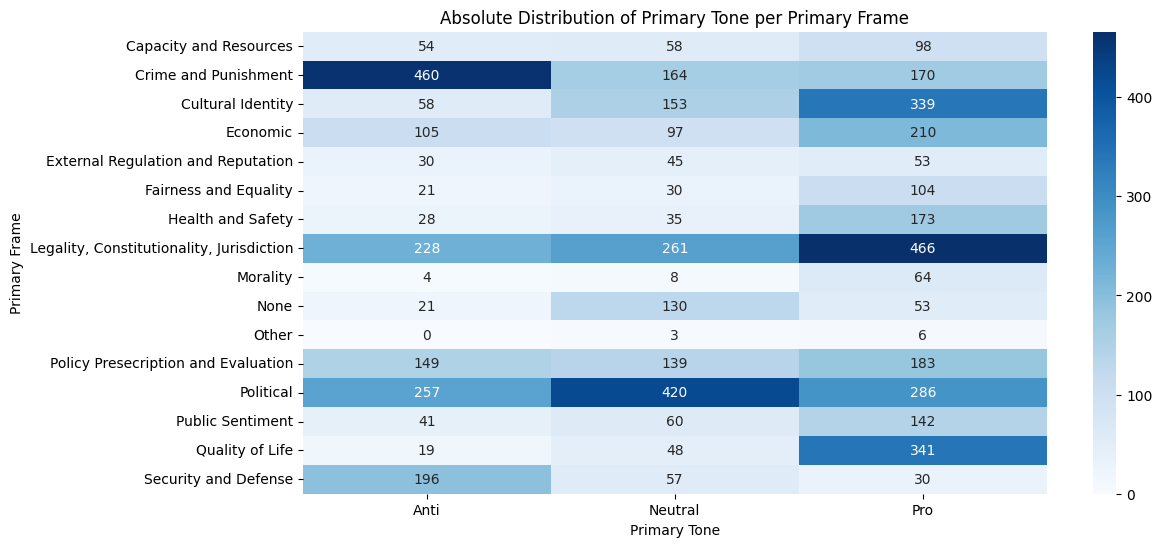

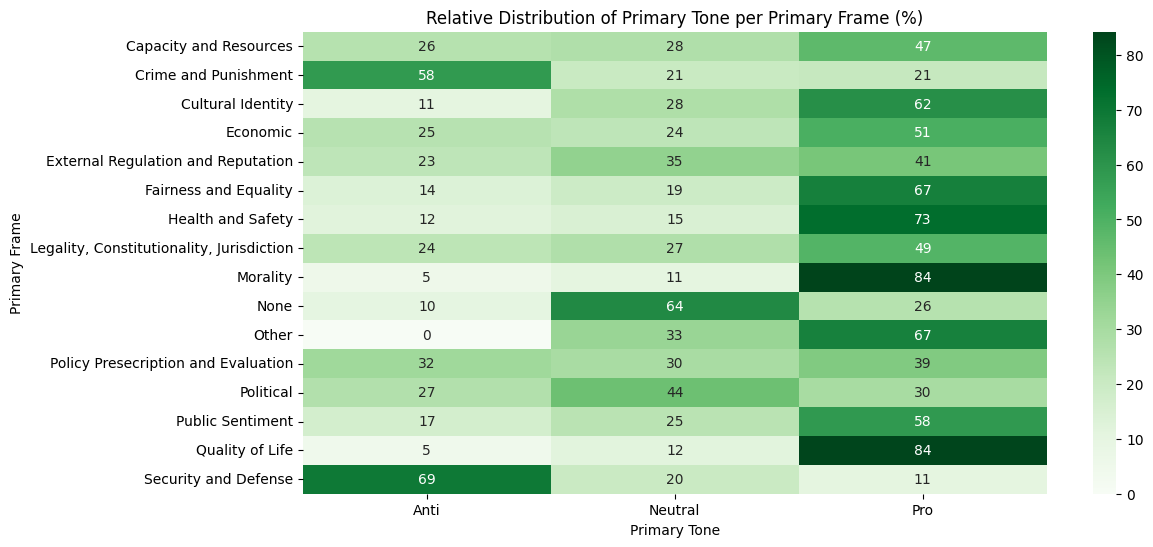

In [57]:
# Group by "primary_frame" and get the distribution of "primary_tone"
grouped = df.groupby('primary_frame')['primary_tone'].value_counts().unstack(fill_value=0)
grouped_relative = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Tone per Primary Frame')
plt.ylabel('Primary Frame')
plt.xlabel('Primary Tone')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Tone per Primary Frame (%)')
plt.ylabel('Primary Frame')
plt.xlabel('Primary Tone')
plt.show()

## Source against Primary Frame Distribution

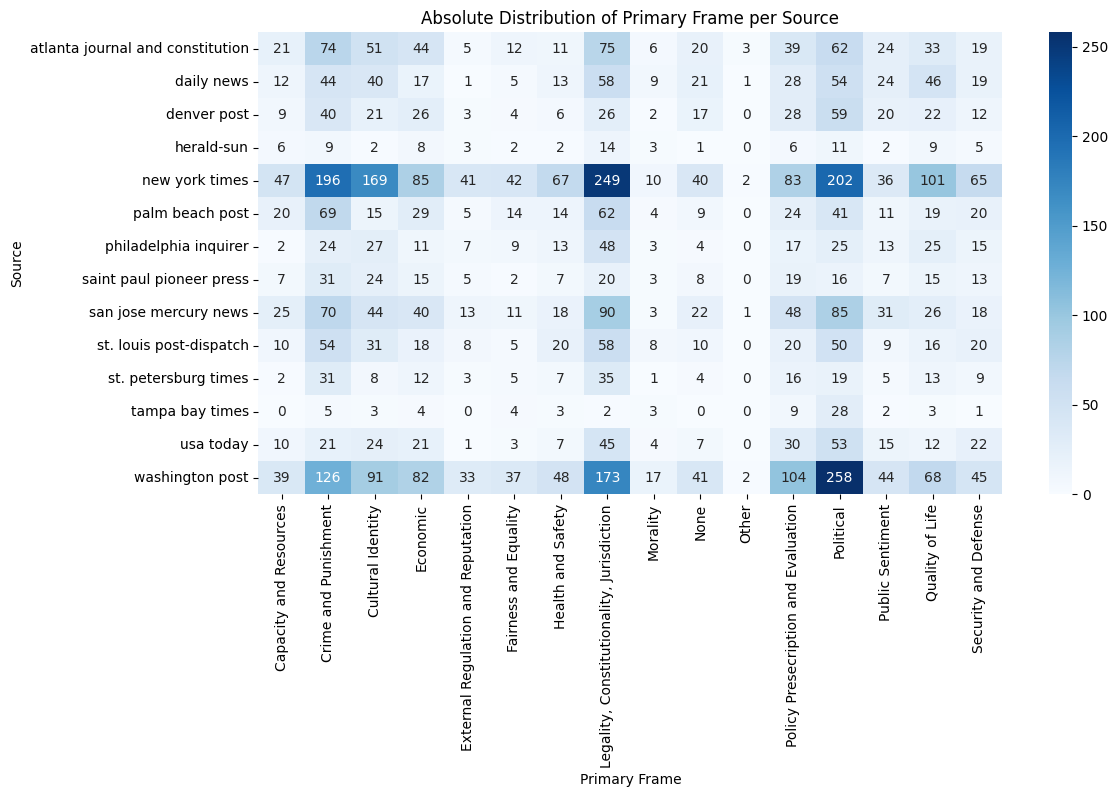

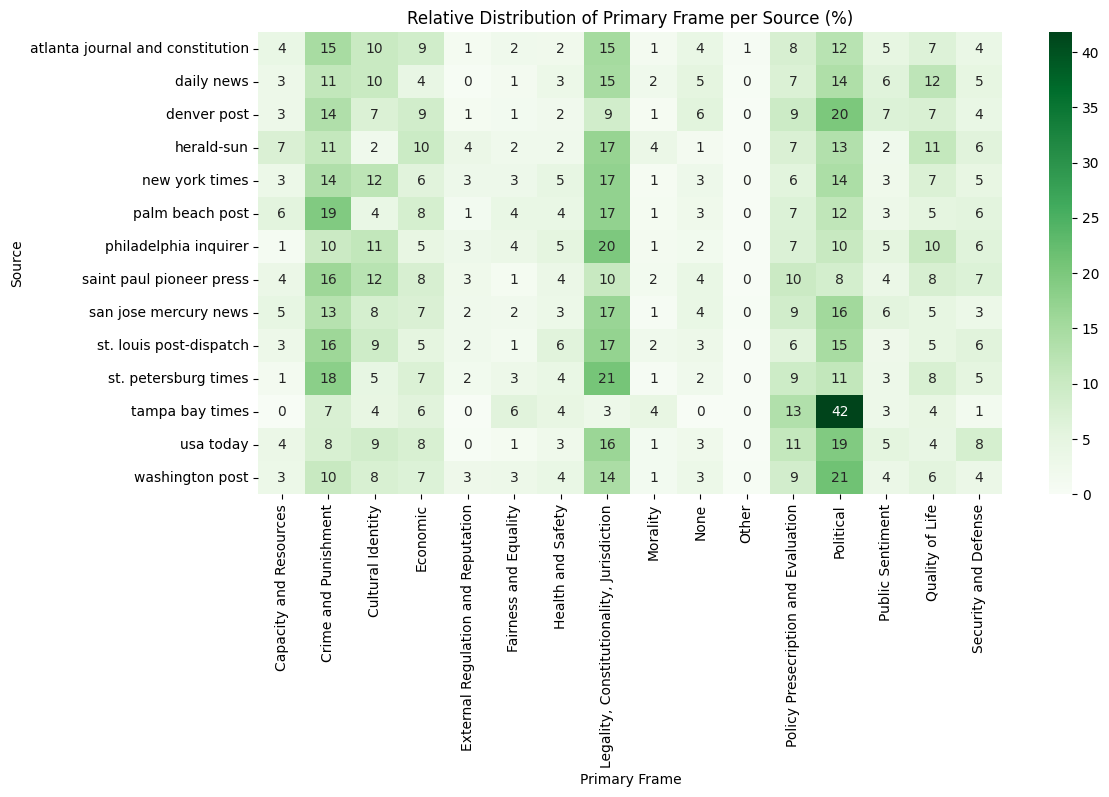

In [58]:
grouped_source = df.groupby('source')['primary_frame'].value_counts().unstack(fill_value=0)
grouped_source_relative = grouped_source.divide(grouped_source.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Frame per Source')
plt.ylabel('Source')
plt.xlabel('Primary Frame')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Frame per Source (%)')
plt.ylabel('Source')
plt.xlabel('Primary Frame')
plt.show()

## Source against Tone Distribution

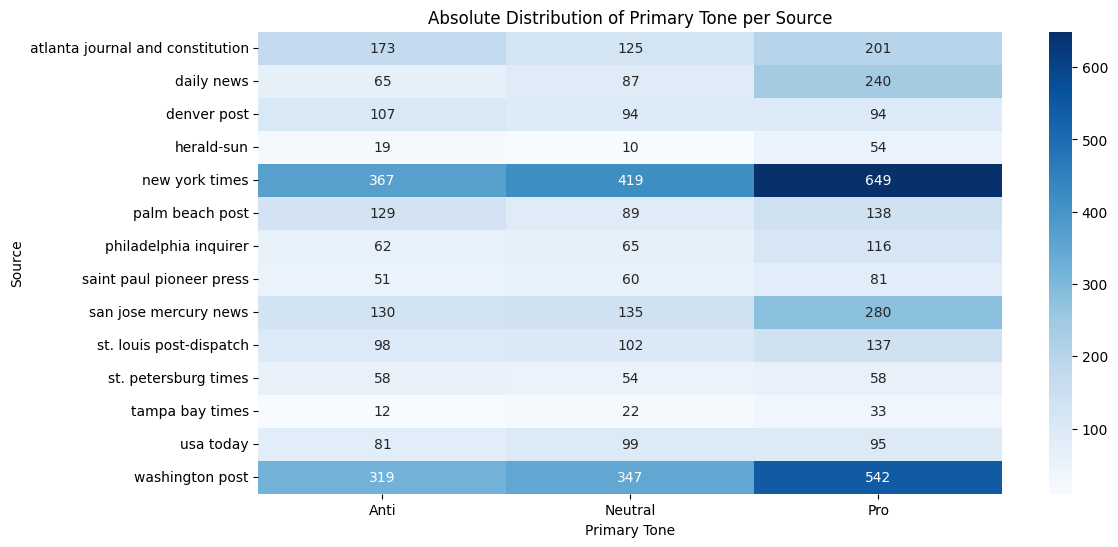

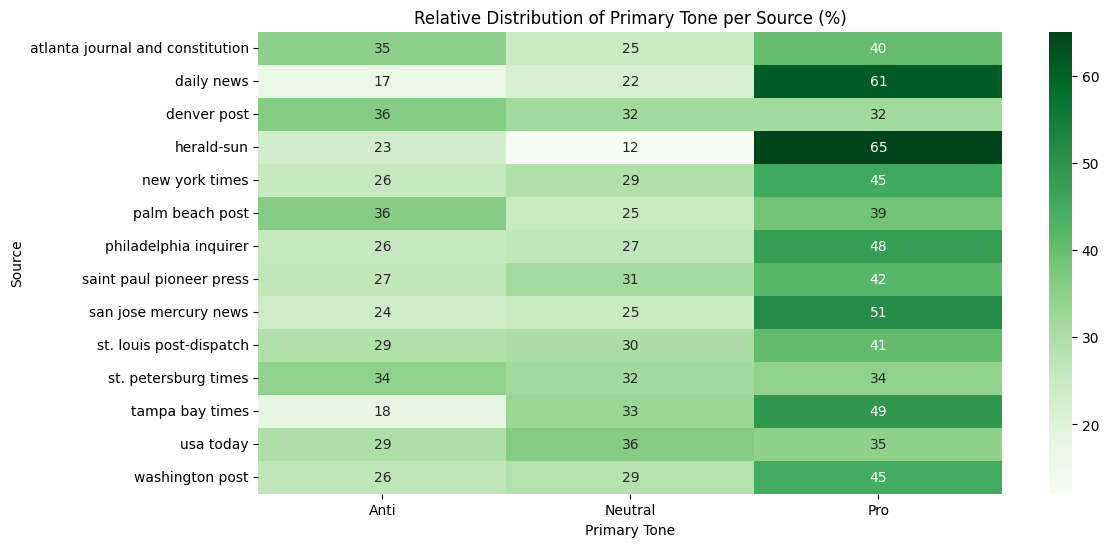

In [59]:
grouped_source_tone = df.groupby('source')['primary_tone'].value_counts().unstack(fill_value=0)
grouped_source_tone_relative = grouped_source_tone.divide(grouped_source_tone.sum(axis=1), axis=0) * 100

# Plot absolute distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_tone, annot=True, fmt="d", cmap="Blues")
plt.title('Absolute Distribution of Primary Tone per Source')
plt.ylabel('Source')
plt.xlabel('Primary Tone')
plt.show()

# Plot relative distribution
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_source_tone_relative, annot=True, fmt=".0f", cmap="Greens")
plt.title('Relative Distribution of Primary Tone per Source (%)')
plt.ylabel('Source')
plt.xlabel('Primary Tone')
plt.show()

## Number of Articles

In [60]:
num_articles = len(df)
articles_table = pd.DataFrame({"Total Articles": [num_articles]})
print(articles_table)


   Total Articles
0            6097


## Articles Per Year

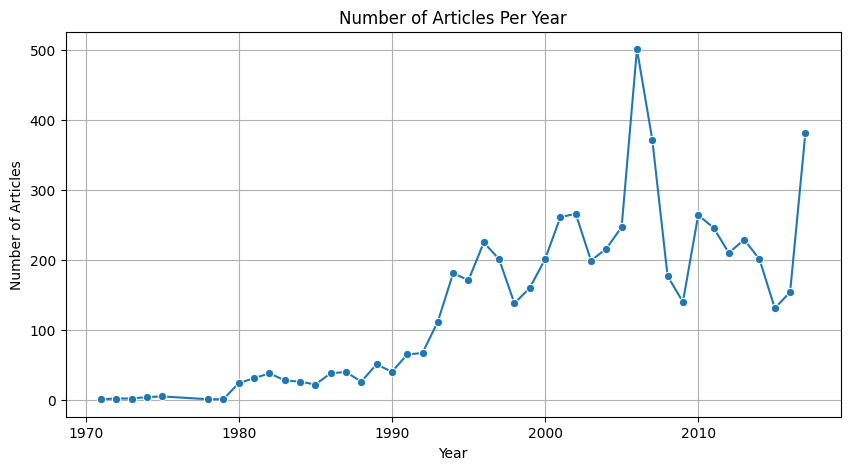

In [61]:
# Example yearly data, adjust according to your 'year' column
article_counts_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=article_counts_per_year.index, y=article_counts_per_year.values, marker='o')
plt.title('Number of Articles Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


## Articles Per "Source"

C:\Users\elias\AppData\Local\Temp\ipykernel_21992\2193349331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_counts_per_source.values, y=article_counts_per_source.index, palette="viridis")


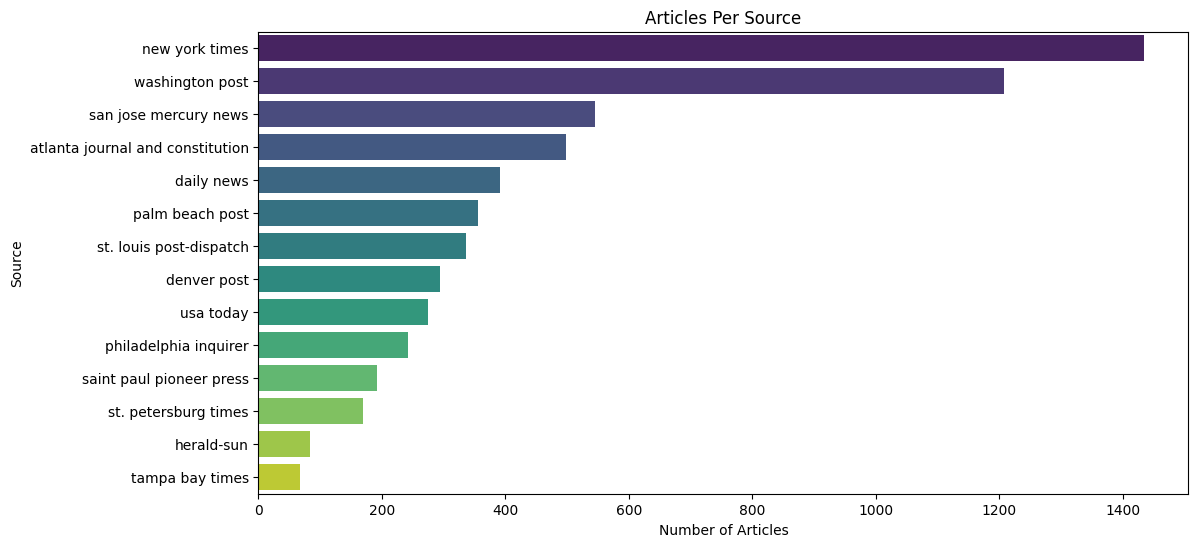

In [62]:
article_counts_per_source = df['source'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=article_counts_per_source.values, y=article_counts_per_source.index, palette="viridis")
plt.title('Articles Per Source')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()


## "Irrelevant" Articles Absolute and Relative

In [16]:
irrelevant_counts = df['irrelevant'].value_counts()
irrelevant_relative = df['irrelevant'].value_counts(normalize=True) * 100

irrelevant_table = pd.DataFrame({
    "Absolute": irrelevant_counts,
    "Relative (%)": irrelevant_relative
})
print(irrelevant_table)


            Absolute  Relative (%)
irrelevant                        
0               6097      90.91858
1                609       9.08142


## Text Length, Number of Sentences, Words/Chars per Sentence

In [17]:
import pandas as pd
import numpy as np

df = pd.read_json('../../data/mfc/immigration_labeled_preprocessed.json')

In [18]:
# Calculate the number of sentences per article
df['num_sentences'] = df.groupby('article_id')['text'].transform('count')

# Calculate the number of words per sentence
df['words_per_sentence'] = df['text'].apply(lambda x: len(x.split()))

# Calculate the metrics for number of sentences per article
sentence_stats = df.groupby('article_id')['num_sentences'].first().describe(percentiles=[.25, .75, .95, .99])

# Calculate the metrics for number of words per sentence
word_stats = df['words_per_sentence'].describe(percentiles=[.25, .75, .95, .99])

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['mean', 'std', 'min', 'median', 'max', '25th_percentile', '75th_percentile', '95th_percentile', '99th_percentile'],
    'Number of Sentence': [
        sentence_stats['mean'], sentence_stats['std'], sentence_stats['min'], sentence_stats['50%'], sentence_stats['max'],
        sentence_stats['25%'], sentence_stats['75%'], sentence_stats['95%'], sentence_stats['99%']
    ],
    'Number of Words': [
        word_stats['mean'], word_stats['std'], word_stats['min'], word_stats['50%'], word_stats['max'],
        word_stats['25%'], word_stats['75%'], word_stats['95%'], word_stats['99%']
    ]
})

summary_df

,Metric,Number of Sentence,Number of Words
0,mean,12.598112,20.001057
1,std,4.439023,12.103197
2,min,1.000000,1.000000
3,median,12.000000,19.000000
4,max,108.000000,166.000000
5,25th_percentile,10.000000,10.000000
6,75th_percentile,14.000000,28.000000
7,95th_percentile,18.000000,41.000000
8,99th_percentile,24.000000,52.000000


## Year to tone distribution

In [19]:
grouped = df.groupby(['year', 'primary_tone']).size().reset_index(name='count')

# Step 2: Normalize the counts within each year
grouped['total_per_year'] = grouped.groupby('year')['count'].transform('sum')
grouped['relative_count'] = grouped['count'] / grouped['total_per_year'] * 100

# Step 3: Create a pivot table for the heatmap
pivot_table = grouped.pivot_table(index='year', columns='primary_tone', values='relative_count', fill_value=0)

# Step 4: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Relative Distribution of Primary Tone by Year (%)')
plt.ylabel('Year')
plt.xlabel('Primary Tone')
plt.show()

KeyError: 'year'

# SRL Analysis

Analyzing the SRL data.

In [ ]:
# read file from data\srls\mfc\mfc_labeled.pkl

df_srl = pd.read_pickle('../../data/srls/mfc/mfc_labeled.pkl')

In [ ]:
# Function to count arguments in each sentence
def count_args(srls):
    count = 0
    for srl in srls:
        if srl['predicate'] and (srl['ARG0'] or srl['ARG1']):
            count += sum([1 for key in ['ARG0', 'ARG1'] if srl[key]])
    return count

# Apply the function to each row
df_srl['arg_count'] = df_srl['srls'].apply(count_args)

# Calculate descriptive statistics for argument count
arg_stats = df_srl['arg_count'].describe(percentiles=[.25, .5, .75, .95, .99]).to_dict()

# Function to count words in predicate, ARG0, and ARG1 individually
def count_words_individually(srls):
    word_counts = []
    for srl in srls:
        word_counts.append({
            'predicate': len(srl['predicate'].split()),
            'ARG0': len(srl.get('ARG0', '').split()),
            'ARG1': len(srl.get('ARG1', '').split())
        })
    return word_counts

# Apply function to count words individually
df_srl['word_counts_individual'] = df_srl['srls'].apply(count_words_individually)

# Flatten the list of word counts without distinguishing between ARG0 and ARG1
all_word_counts = []

for word_count_list in df_srl['word_counts_individual']:
    for word_count in word_count_list:
        all_word_counts.append(word_count['predicate'])
        all_word_counts.append(word_count['ARG0'])
        all_word_counts.append(word_count['ARG1'])

# Convert to a DataFrame for easy calculation of statistics
df_all_word_counts = pd.DataFrame(all_word_counts, columns=['word_count'])

# Compute statistics for the combined word counts
word_stats = df_all_word_counts['word_count'].describe(percentiles=[.25, .5, .75, .95, .99]).to_dict()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['mean', 'std', 'min', 'median', 'max', '25th_percentile', '75th_percentile', '95th_percentile', '99th_percentile'],
    'Argument Count': [
        arg_stats['mean'], arg_stats['std'], arg_stats['min'], arg_stats['50%'], arg_stats['max'],
        arg_stats['25%'], arg_stats['75%'], arg_stats['95%'], arg_stats['99%']
    ],
    'Word Count': [
        word_stats['mean'], word_stats['std'], word_stats['min'], word_stats['50%'], word_stats['max'],
        word_stats['25%'], word_stats['75%'], word_stats['95%'], word_stats['99%']
    ]
})

summary_df

,Metric,Argument Count,Word Count
0,mean,4.287561,3.067681
1,std,3.147450,5.425260
2,min,0.000000,0.000000
3,median,4.000000,1.000000
4,max,41.000000,119.000000
5,25th_percentile,2.000000,1.000000
6,75th_percentile,6.000000,3.000000
7,95th_percentile,10.000000,14.000000
8,99th_percentile,13.000000,28.000000
